In [5]:
import pandas as pd
import numpy as np
import csv

diabetes_csv = pd.read_csv(r'data\diabetes.csv')
from sklearn.model_selection import train_test_split

df_diabetes = pd.DataFrame(data = diabetes_csv, index = None)


df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
print("Data Null \n", df_diabetes.isnull().sum())

print("Data Kosong \n", df_diabetes.empty)

print("Data Nan \n", df_diabetes.isna().sum())

Data Null 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Data Kosong 
 False
Data Nan 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome'>

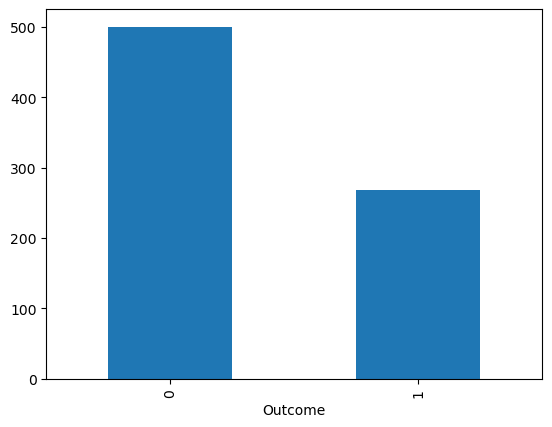

In [15]:
df_diabetes['Outcome'] = df_diabetes.Outcome.astype(int)

freq = df_diabetes.Outcome.value_counts()

freq.plot(kind='bar')

In [19]:
X = df_diabetes.drop('Outcome', axis=1)

y = df_diabetes.Outcome


#TRAINING

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=33)


print("Bentuk X_train ", X_train.shape)
print("Bentuk X_test ", X_test.shape)

print("Bentuk y_train ", y_train.shape)
print("Bentuk y_test ", y_test.shape)


print("y_train ", y_train)
print("y_test ", y_test)

Bentuk X_train  (576, 8)
Bentuk X_test  (192, 8)
Bentuk y_train  (576,)
Bentuk y_test  (192,)
y_train  177    1
677    0
275    0
126    0
65     0
      ..
658    0
578    0
728    0
391    1
20     0
Name: Outcome, Length: 576, dtype: int32
y_test  456    0
684    0
510    1
434    0
31     1
      ..
637    0
186    1
490    0
430    0
302    0
Name: Outcome, Length: 192, dtype: int32


In [23]:
#import library untuk model machine learning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#membuat obyek model machine learning dan setting parameternya
##nilai random state diganti dengan 2 digit npm terakhir
SVM = SVC(C = 1, gamma= 0.01, random_state=42)
RF = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=33)

#fungsi fit digunakan untuk melatih machine learning
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=33)

In [25]:
#membuat array untuk X baru yang akan diprediksi
X_new = np.array([[3, 197, 30, 19, 0, 44.8, 0.567, 55]])

print("X_new yang akan diprediksi", X_new.shape)

#prediksi label dari X baru
svm_predict = SVM.predict(X_new)
print("Label prediksi SVM", svm_predict)
rf_predict = RF.predict(X_new)
print("Label prediksi RF", rf_predict)

X_new yang akan diprediksi (1, 8)
Label prediksi SVM [0]
Label prediksi RF [1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
y_pred_svm = SVM.predict(X_test)
y_pred_rf = RF.predict(X_test)

print("Hasil prediksi SVM pada X_test:", y_pred_svm)
print("Hasil prediksi RF pada X_test:", y_pred_rf)

Hasil prediksi SVM pada X_test: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
Hasil prediksi RF pada X_test: [0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0]


In [ ]:
import pickle 

with open('knn_dt_diabetes_model.pkl', 'wb') as f:
    pickle.dump((KNN, DT), f)
    
print("Model KNN dan DT berhasil Disimpan")

In [31]:
#menggunakan fungsi score untuk mengukur akurasi prediksi model
print("Akurasi model SVM:", round(SVM.score(X_test, y_test), 3))
print("Akurasi model RF:", round(RF.score(X_test, y_test), 3))

Akurasi model SVM: 0.651
Akurasi model RF: 0.745


In [33]:
#simpan model menggunakan library Pickle
import pickle

with open('rf_diabetes_model.pkl', 'wb') as f:
    pickle.dump((RF), f)

##File pickle(.pkl) akan tersimpan di folder yang sama dengan file notebook
   
print("Model RF berhasil disimpan")

Model RF berhasil disimpan


In [39]:
# Identify numeric columns
numeric_columns = df_diabetes.select_dtypes(include=['number']).columns

# Initialize dictionaries to store min and max values
min_values = {}
max_values = {}

# Calculate min and max for each numeric column
for column in numeric_columns:
    min_values[column] = df_diabetes[column].min()
    max_values[column] = df_diabetes[column].max()

In [41]:
print("Minimum values:\n", min_values)
print("Maximum values:\n", max_values)

Minimum values:
 {'Pregnancies': 0, 'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0.0, 'DiabetesPedigreeFunction': 0.078, 'Age': 21, 'Outcome': 0}
Maximum values:
 {'Pregnancies': 17, 'Glucose': 199, 'BloodPressure': 122, 'SkinThickness': 99, 'Insulin': 846, 'BMI': 67.1, 'DiabetesPedigreeFunction': 2.42, 'Age': 81, 'Outcome': 1}


In [43]:
file_path = 'Model/rf_diabetes_model.pkl'
with open(file_path,'rb') as file:
    model = pickle.load(file)
print("load success")

load success


In [48]:
rf_model = model[0]

prediction = model.predict([[3, 197, 30, 19, 0, 44.8, 0.567, 55]])

print(prediction)

[1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
